In [6]:
import pandas as pd

# Load data penjualan
penjualan = pd.read_excel("C://Users//wahyu//Downloads//penjualan.xlsx")  # Ganti dengan path file sesuai kebutuhan

# Pastikan kolom tanggal bertipe datetime
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])

# Sortir berdasarkan tanggal (opsional tapi disarankan)
penjualan = penjualan.sort_values("Tanggal")

# Rekap menjadi mingguan (setiap Senin sebagai awal minggu)
penjualan_mingguan = penjualan.resample("W-MON", on="Tanggal")["Total Penjualan"].sum().reset_index()

# Tampilkan hasil rekap
penjualan_mingguan


,Tanggal,Total Penjualan
0,2024-11-04,254000
1,2024-11-11,540000
2,2024-11-18,602000
3,2024-11-25,2950500
4,2024-12-02,737000


Forecast Naive Mingguan:
     Tanggal  Total Penjualan  Naive Forecast      Error  Absolute Error
0 2024-11-04           254000             NaN        NaN             NaN
1 2024-11-11           540000        254000.0   286000.0        286000.0
2 2024-11-18           602000        540000.0    62000.0         62000.0
3 2024-11-25          2950500        602000.0  2348500.0       2348500.0
4 2024-12-02           737000       2950500.0 -2213500.0       2213500.0

Mean Absolute Error (MAE): 1227500.00


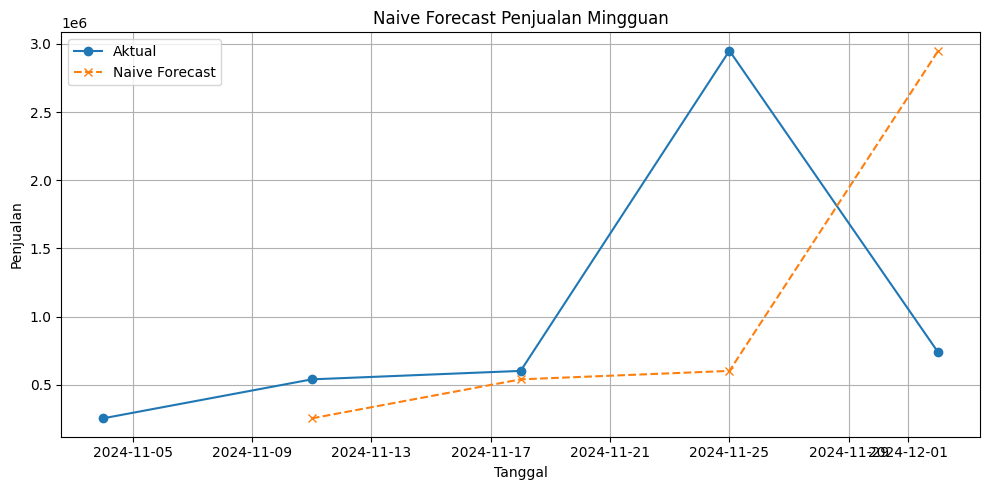

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Baca data penjualan dari CSV
# penjualan = pd.read_csv("penjualan.csv")  # Ganti dengan path CSV kamu

# 2. Ubah kolom tanggal jadi datetime dan urutkan
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 3. Rekap jadi penjualan mingguan (berbasis Senin)
penjualan_mingguan = penjualan.resample("W-MON", on="Tanggal")["Total Penjualan"].sum().reset_index()

# 4. Buat kolom naive forecast (nilai minggu sebelumnya sebagai prediksi minggu ini)
penjualan_mingguan["Naive Forecast"] = penjualan_mingguan["Total Penjualan"].shift(1)

# 5. Hitung error (optional untuk evaluasi)
penjualan_mingguan["Error"] = penjualan_mingguan["Total Penjualan"] - penjualan_mingguan["Naive Forecast"]
penjualan_mingguan["Absolute Error"] = penjualan_mingguan["Error"].abs()

# 6. Hitung MAE (Mean Absolute Error)
mae = penjualan_mingguan["Absolute Error"].mean()

# 7. Tampilkan hasil
print("Forecast Naive Mingguan:")
print(penjualan_mingguan)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")

# 8. Visualisasi (opsional)
plt.figure(figsize=(10,5))
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Total Penjualan"], marker='o', label="Aktual")
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Naive Forecast"], marker='x', linestyle='--', label="Naive Forecast")
plt.title("Naive Forecast Penjualan Mingguan")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

     Tanggal  Total Penjualan  Naive Forecast  Forecast Error  Tracking Signal
0 2024-11-04           254000             NaN             NaN              NaN
1 2024-11-11           540000        254000.0        286000.0         1.000000
2 2024-11-18           602000        540000.0         62000.0         2.000000
3 2024-11-25          2950500        602000.0       2348500.0         3.000000
4 2024-12-02           737000       2950500.0      -2213500.0         0.393483


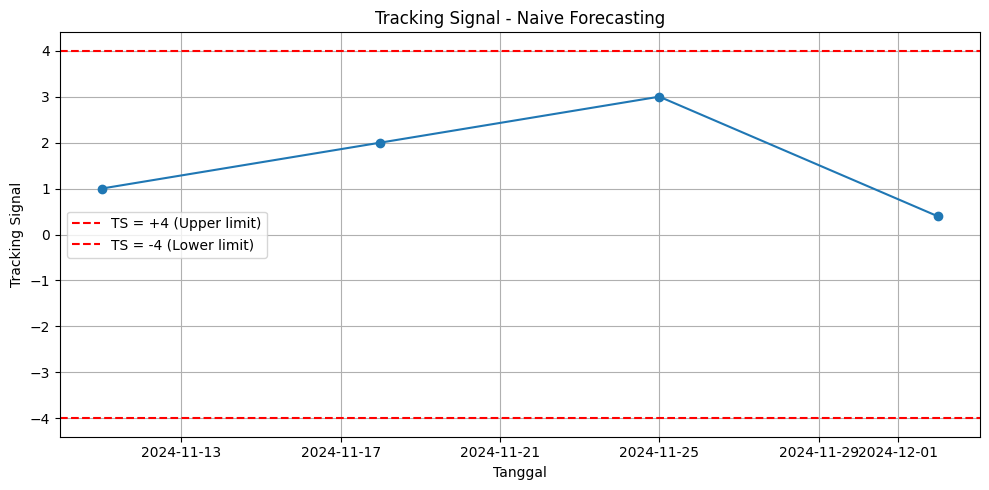

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
# penjualan = pd.read_csv("penjualan.csv")  # Ganti path sesuai file kamu
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 2. Resample ke mingguan
penjualan_mingguan = penjualan.resample("W-MON", on="Tanggal")["Total Penjualan"].sum().reset_index()

# 3. Naïve Forecast = nilai minggu sebelumnya
penjualan_mingguan["Naive Forecast"] = penjualan_mingguan["Total Penjualan"].shift(1)

# 4. Error dan Absolute Error
penjualan_mingguan["Forecast Error"] = penjualan_mingguan["Total Penjualan"] - penjualan_mingguan["Naive Forecast"]
penjualan_mingguan["Absolute Error"] = penjualan_mingguan["Forecast Error"].abs()

# 5. Hitung Tracking Signal
penjualan_mingguan["Cumulative Error"] = penjualan_mingguan["Forecast Error"].cumsum()
penjualan_mingguan["MAD"] = penjualan_mingguan["Absolute Error"].expanding().mean()
penjualan_mingguan["Tracking Signal"] = penjualan_mingguan["Cumulative Error"] / penjualan_mingguan["MAD"]

# 6. Tampilkan hasil akhir
print(penjualan_mingguan[["Tanggal", "Total Penjualan", "Naive Forecast", "Forecast Error", "Tracking Signal"]])

# 7. Visualisasi (opsional)
plt.figure(figsize=(10,5))
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Tracking Signal"], marker='o', linestyle='-')
plt.axhline(y=4, color='r', linestyle='--', label='TS = +4 (Upper limit)')
plt.axhline(y=-4, color='r', linestyle='--', label='TS = -4 (Lower limit)')
plt.title("Tracking Signal - Naive Forecasting")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



=== Hasil Forecast 3-MA ===

     Tanggal  Total Penjualan  3MA Forecast  Forecast Error  Tracking Signal
0 2024-11-04           254000           NaN             NaN              NaN
1 2024-11-11           540000           NaN             NaN              NaN
2 2024-11-18           602000           NaN             NaN              NaN
3 2024-11-25          2950500  4.653333e+05    2.485167e+06          1.00000
4 2024-12-02           737000  1.364167e+06   -6.271667e+05          1.19396


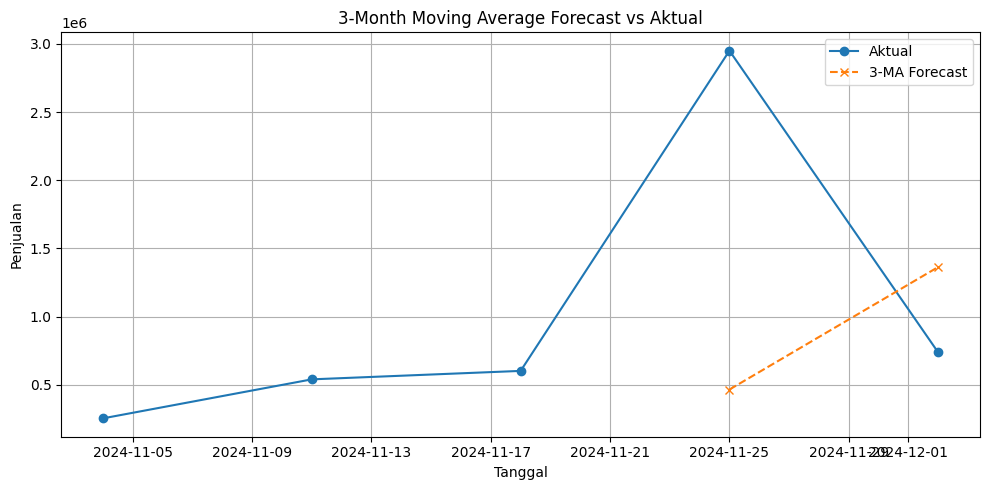

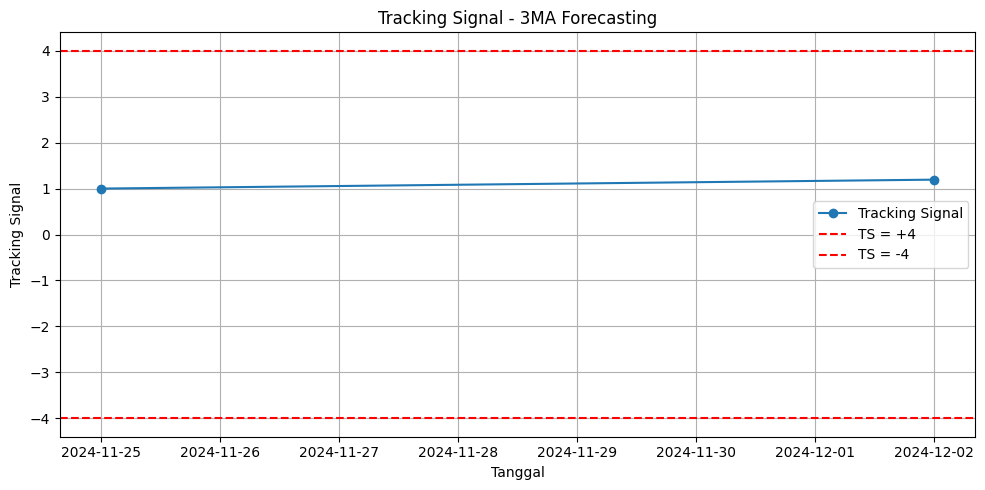

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load dan siapkan data
# penjualan = pd.read_csv("penjualan.csv")  # Ganti path jika berbeda
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 2. Rekap mingguan (setiap Senin)
penjualan_mingguan = penjualan.resample("W-MON", on="Tanggal")["Total Penjualan"].sum().reset_index()

# 3. Hitung 3-Point Moving Average
penjualan_mingguan["3MA Forecast"] = penjualan_mingguan["Total Penjualan"].rolling(window=3).mean().shift(1)

# 4. Error dan Absolute Error
penjualan_mingguan["Forecast Error"] = penjualan_mingguan["Total Penjualan"] - penjualan_mingguan["3MA Forecast"]
penjualan_mingguan["Absolute Error"] = penjualan_mingguan["Forecast Error"].abs()

# 5. Tracking Signal
penjualan_mingguan["Cumulative Error"] = penjualan_mingguan["Forecast Error"].cumsum()
penjualan_mingguan["MAD"] = penjualan_mingguan["Absolute Error"].expanding().mean()
penjualan_mingguan["Tracking Signal"] = penjualan_mingguan["Cumulative Error"] / penjualan_mingguan["MAD"]

# 6. Tampilkan tabel hasil
print("\n=== Hasil Forecast 3-MA ===\n")
print(penjualan_mingguan[["Tanggal", "Total Penjualan", "3MA Forecast", "Forecast Error", "Tracking Signal"]])

# 7. Visualisasi 1: Perbandingan Aktual vs Prediksi
plt.figure(figsize=(10,5))
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Total Penjualan"], marker='o', label="Aktual")
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["3MA Forecast"], marker='x', linestyle='--', label="3-MA Forecast")
plt.title("3-Month Moving Average Forecast vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 8. Visualisasi 2: Tracking Signal
plt.figure(figsize=(10,5))
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Tracking Signal"], marker='o', label="Tracking Signal")
plt.axhline(4, color='red', linestyle='--', label='TS = +4')
plt.axhline(-4, color='red', linestyle='--', label='TS = -4')
plt.title("Tracking Signal - 3MA Forecasting")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



=== Hasil Weighted Moving Average ===

     Tanggal  Total Penjualan  WMA Forecast  Forecast Error  Tracking Signal
0 2024-11-04           254000           NaN             NaN              NaN
1 2024-11-11           540000           NaN             NaN              NaN
2 2024-11-18           602000           NaN             NaN              NaN
3 2024-11-25          2950500      513800.0       2436700.0         1.000000
4 2024-12-02           737000     1763850.0      -1026850.0         0.814107


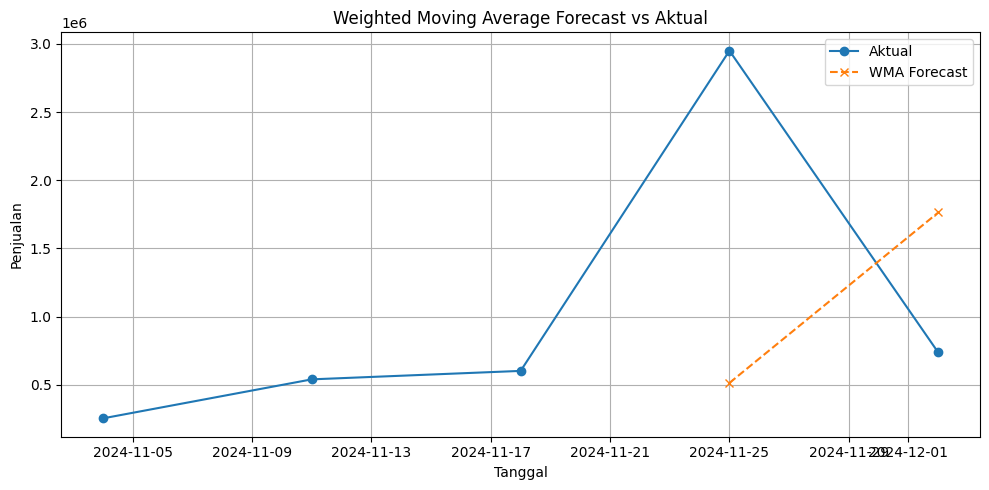

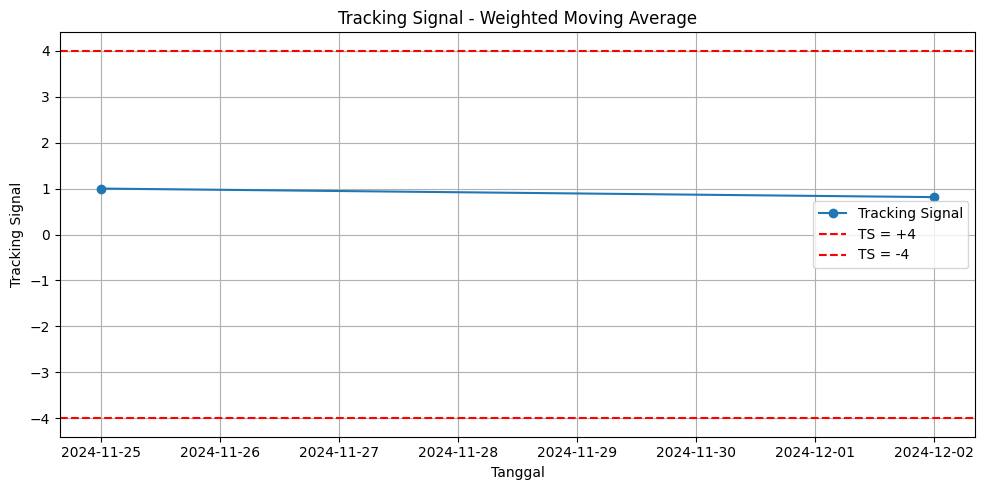

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. Load data
 # Ganti sesuai nama file
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 2. Rekap mingguan
penjualan_mingguan = penjualan.resample("W-MON", on="Tanggal")["Total Penjualan"].sum().reset_index()

# 3. Weighted Moving Average Manual: bobot dari lama ke baru [w3, w2, w1]
weights = [0.2, 0.3, 0.5]

# Hitung WMA secara manual
def weighted_moving_avg(series, weights):
    result = []
    for i in range(len(series)):
        if i < len(weights):
            result.append(np.nan)
        else:
            window = series[i-3:i]
            wma = np.dot(window, weights)
            result.append(wma)
    return result

penjualan_mingguan["WMA Forecast"] = weighted_moving_avg(penjualan_mingguan["Total Penjualan"].values, weights)

# 4. Error dan Absolute Error
penjualan_mingguan["Forecast Error"] = penjualan_mingguan["Total Penjualan"] - penjualan_mingguan["WMA Forecast"]
penjualan_mingguan["Absolute Error"] = penjualan_mingguan["Forecast Error"].abs()

# 5. Tracking Signal
penjualan_mingguan["Cumulative Error"] = penjualan_mingguan["Forecast Error"].cumsum()
penjualan_mingguan["MAD"] = penjualan_mingguan["Absolute Error"].expanding().mean()
penjualan_mingguan["Tracking Signal"] = penjualan_mingguan["Cumulative Error"] / penjualan_mingguan["MAD"]

# 6. Tampilkan tabel hasil
print("\n=== Hasil Weighted Moving Average ===\n")
print(penjualan_mingguan[["Tanggal", "Total Penjualan", "WMA Forecast", "Forecast Error", "Tracking Signal"]])

# 7. Visualisasi 1: Aktual vs WMA
plt.figure(figsize=(10,5))
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Total Penjualan"], marker='o', label="Aktual")
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["WMA Forecast"], marker='x', linestyle='--', label="WMA Forecast")
plt.title("Weighted Moving Average Forecast vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 8. Visualisasi 2: Tracking Signal
plt.figure(figsize=(10,5))
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Tracking Signal"], marker='o', label="Tracking Signal")
plt.axhline(4, color='red', linestyle='--', label='TS = +4')
plt.axhline(-4, color='red', linestyle='--', label='TS = -4')
plt.title("Tracking Signal - Weighted Moving Average")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


      Tanggal  Total Penjualan   3MA Forecast          Error  Tracking Signal
0  2024-11-01            14000            NaN            NaN              NaN
1  2024-11-02            15000            NaN            NaN              NaN
2  2024-11-02            15000            NaN            NaN              NaN
3  2024-11-02            60000   14666.666667   45333.333333         1.000000
4  2024-11-03            50000   30000.000000   20000.000000         2.000000
..        ...              ...            ...            ...              ...
90 2024-11-28            33000   85000.000000  -52000.000000         2.723835
91 2024-11-28           125000   69333.333333   55666.666667         4.064966
87 2024-11-28            50000  102666.666667  -52666.666667         2.776738
88 2024-11-28            49000   69333.333333  -20333.333333         2.297455
92 2024-12-01           190000   74666.666667  115333.333333         5.005748

[93 rows x 5 columns]


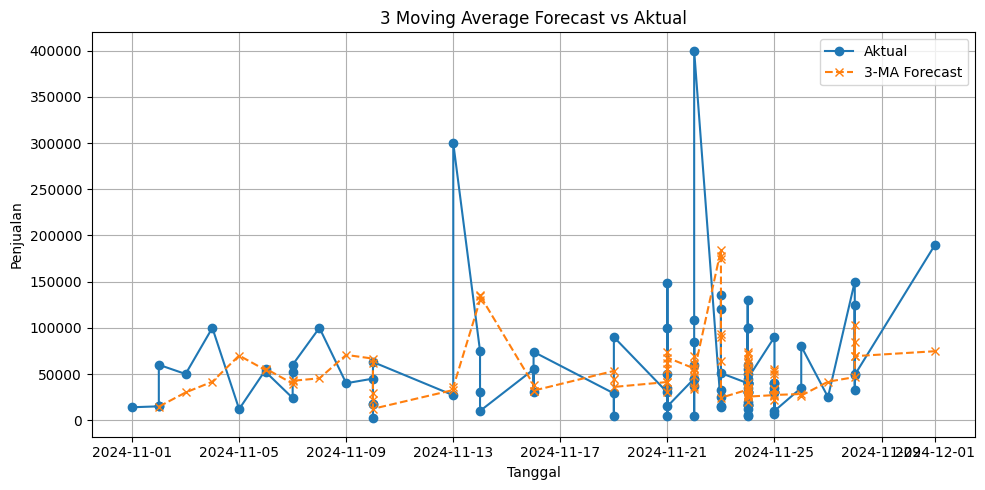

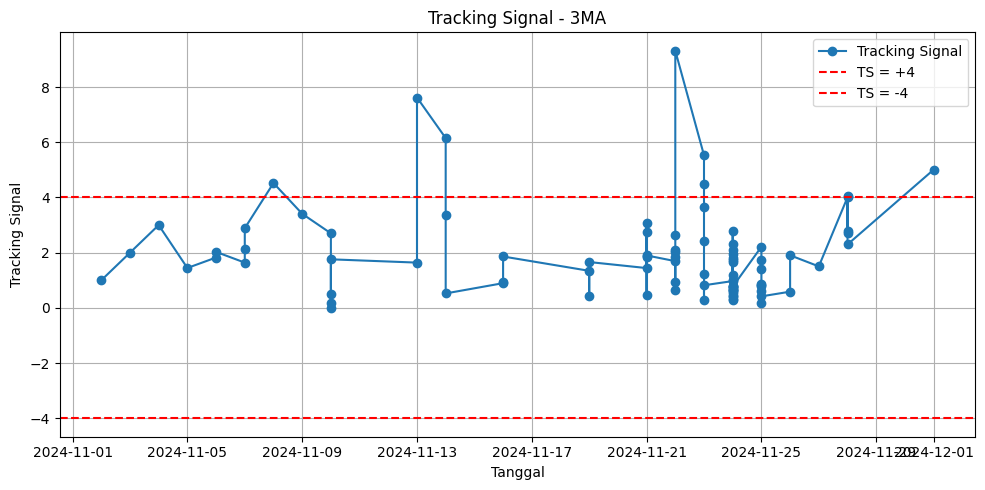

In [16]:

import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data

penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 2. Hitung 3-day Moving Average Forecast
penjualan["3MA Forecast"] = penjualan["Total Penjualan"].rolling(window=3).mean().shift(1)

# 3. Error dan Tracking Signal
penjualan["Error"] = penjualan["Total Penjualan"] - penjualan["3MA Forecast"]
penjualan["Absolute Error"] = penjualan["Error"].abs()
penjualan["Cumulative Error"] = penjualan["Error"].cumsum()
penjualan["MAD"] = penjualan["Absolute Error"].expanding().mean()
penjualan["Tracking Signal"] = penjualan["Cumulative Error"] / penjualan["MAD"]

# 4. Cetak hasil tabel
print(penjualan[["Tanggal", "Total Penjualan", "3MA Forecast", "Error", "Tracking Signal"]])

# 5. Visualisasi 1: Aktual vs 3MA
plt.figure(figsize=(10, 5))
plt.plot(penjualan["Tanggal"], penjualan["Total Penjualan"], marker='o', label="Aktual")
plt.plot(penjualan["Tanggal"], penjualan["3MA Forecast"], marker='x', linestyle='--', label="3-MA Forecast")
plt.title("3 Moving Average Forecast vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Visualisasi 2: Tracking Signal
plt.figure(figsize=(10, 5))
plt.plot(penjualan["Tanggal"], penjualan["Tracking Signal"], marker='o', label="Tracking Signal")
plt.axhline(4, color='red', linestyle='--', label='TS = +4')
plt.axhline(-4, color='red', linestyle='--', label='TS = -4')
plt.title("Tracking Signal - 3MA")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


     Tanggal  Total Penjualan  Exponential Forecast  Forecast Error  \
0 2024-11-04           254000              254000.0             0.0   
1 2024-11-11           540000              254000.0        286000.0   
2 2024-11-18           602000              368400.0        233600.0   
3 2024-11-25          2950500              461840.0       2488660.0   
4 2024-12-02           737000             1457304.0       -720304.0   

   Tracking Signal  
0              NaN  
1         2.000000  
2         3.000000  
3         4.000000  
4         3.068146  


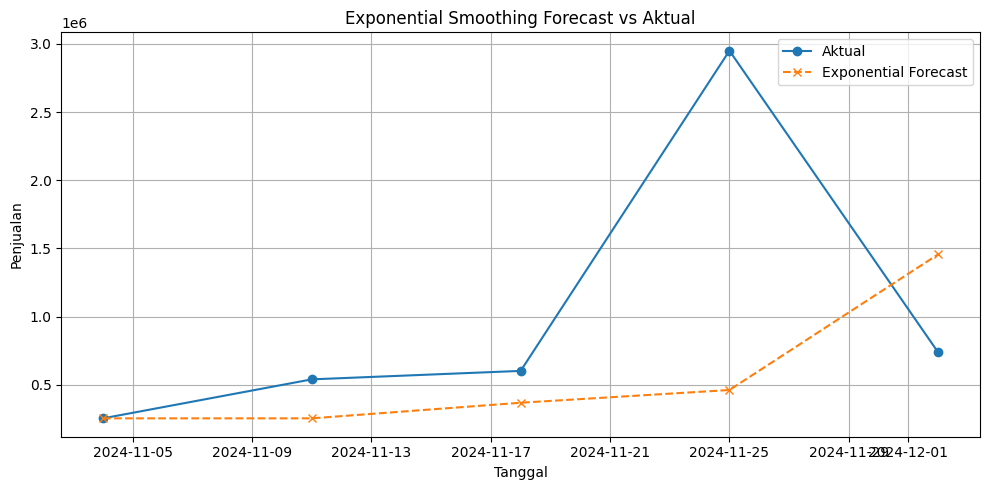

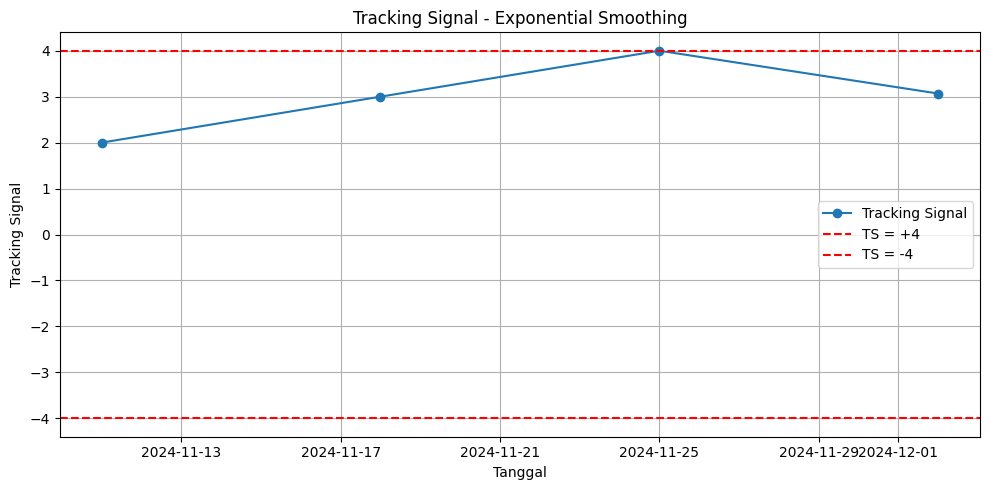

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
 # Ganti jika pakai Excel
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 2. Rekap mingguan
penjualan_mingguan = penjualan.resample("W-MON", on="Tanggal")["Total Penjualan"].sum().reset_index()

# 3. Parameter smoothing (alpha)
alpha = 0.4 # Kamu bisa ubah antara 0.1 s/d 0.9

# 4. Inisialisasi forecast: gunakan nilai pertama sebagai forecast pertama
forecast = [penjualan_mingguan["Total Penjualan"].iloc[0]]

# 5. Hitung forecast mingguan berikutnya
for i in range(1, len(penjualan_mingguan)):
    prev_forecast = forecast[-1]
    actual = penjualan_mingguan["Total Penjualan"].iloc[i - 1]
    forecast.append(alpha * actual + (1 - alpha) * prev_forecast)

penjualan_mingguan["Exponential Forecast"] = forecast

# 6. Error & Tracking Signal
penjualan_mingguan["Forecast Error"] = penjualan_mingguan["Total Penjualan"] - penjualan_mingguan["Exponential Forecast"]
penjualan_mingguan["Absolute Error"] = penjualan_mingguan["Forecast Error"].abs()
penjualan_mingguan["Cumulative Error"] = penjualan_mingguan["Forecast Error"].cumsum()
penjualan_mingguan["MAD"] = penjualan_mingguan["Absolute Error"].expanding().mean()
penjualan_mingguan["Tracking Signal"] = penjualan_mingguan["Cumulative Error"] / penjualan_mingguan["MAD"]

# 7. Tampilkan tabel hasil
print(penjualan_mingguan[["Tanggal", "Total Penjualan", "Exponential Forecast", "Forecast Error", "Tracking Signal"]])

# 8. Visualisasi 1: Aktual vs Prediksi
plt.figure(figsize=(10,5))
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Total Penjualan"], marker='o', label="Aktual")
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Exponential Forecast"], marker='x', linestyle='--', label="Exponential Forecast")
plt.title("Exponential Smoothing Forecast vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Visualisasi 2: Tracking Signal
plt.figure(figsize=(10,5))
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Tracking Signal"], marker='o', label="Tracking Signal")
plt.axhline(4, color='red', linestyle='--', label='TS = +4')
plt.axhline(-4, color='red', linestyle='--', label='TS = -4')
plt.title("Tracking Signal - Exponential Smoothing")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


     Tanggal  Total Penjualan  Holt Forecast  Forecast Error  Tracking Signal
0 2024-11-04           254000   5.400000e+05   -2.860000e+05        -1.000000
1 2024-11-11           540000   6.115000e+05   -7.150000e+04        -2.000000
2 2024-11-18           602000   7.723750e+05   -1.703750e+05        -3.000000
3 2024-11-25          2950500   8.412188e+05    2.109281e+06         2.398654
4 2024-12-02           737000   2.577211e+06   -1.840211e+06        -0.289014


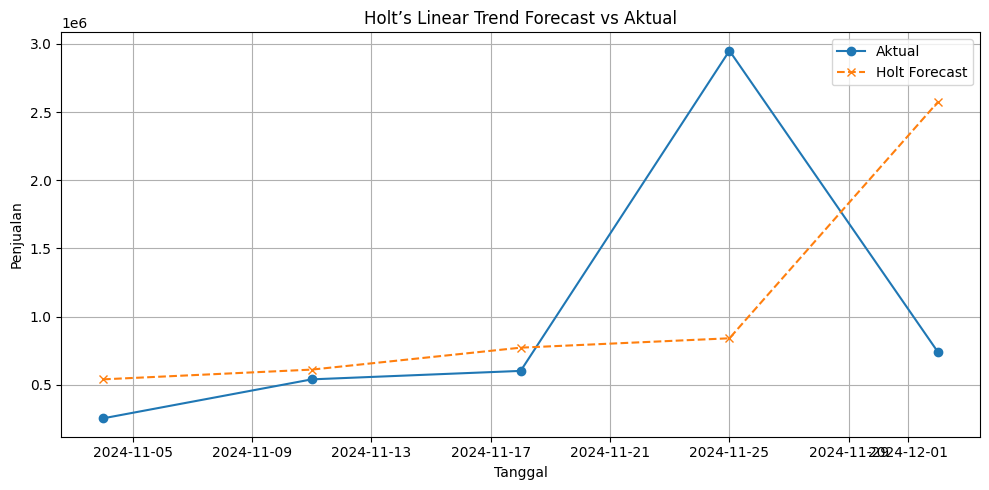

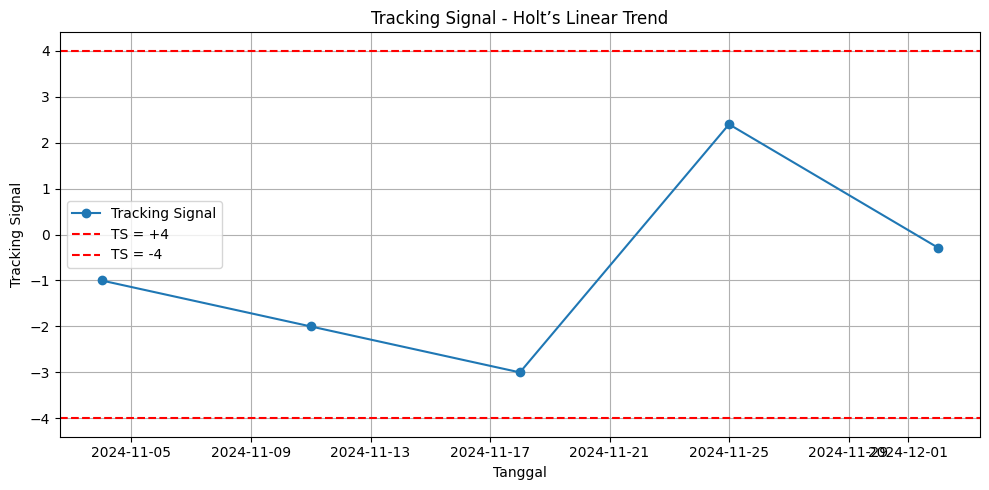

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# 1. Load data penjualan
 # Ganti ke .xlsx jika perlu
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 2. Rekap penjualan mingguan
penjualan_mingguan = penjualan.resample("W-MON", on="Tanggal")["Total Penjualan"].sum().reset_index()

# 3. Terapkan Holt’s Linear Trend
model = Holt(penjualan_mingguan["Total Penjualan"])
fit = model.fit(smoothing_level=0.5, smoothing_trend=0.5, optimized=False)  # atau coba optimized=True
penjualan_mingguan["Holt Forecast"] = fit.fittedvalues

# 4. Hitung error dan tracking signal
penjualan_mingguan["Forecast Error"] = penjualan_mingguan["Total Penjualan"] - penjualan_mingguan["Holt Forecast"]
penjualan_mingguan["Absolute Error"] = penjualan_mingguan["Forecast Error"].abs()
penjualan_mingguan["Cumulative Error"] = penjualan_mingguan["Forecast Error"].cumsum()
penjualan_mingguan["MAD"] = penjualan_mingguan["Absolute Error"].expanding().mean()
penjualan_mingguan["Tracking Signal"] = penjualan_mingguan["Cumulative Error"] / penjualan_mingguan["MAD"]

# 5. Tampilkan tabel hasil
print(penjualan_mingguan[["Tanggal", "Total Penjualan", "Holt Forecast", "Forecast Error", "Tracking Signal"]])

# 6. Visualisasi: Aktual vs Holt Forecast
plt.figure(figsize=(10,5))
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Total Penjualan"], marker='o', label="Aktual")
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Holt Forecast"], marker='x', linestyle='--', label="Holt Forecast")
plt.title("Holt’s Linear Trend Forecast vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Visualisasi Tracking Signal
plt.figure(figsize=(10,5))
plt.plot(penjualan_mingguan["Tanggal"], penjualan_mingguan["Tracking Signal"], marker='o', label="Tracking Signal")
plt.axhline(4, color='red', linestyle='--', label='TS = +4')
plt.axhline(-4, color='red', linestyle='--', label='TS = -4')
plt.title("Tracking Signal - Holt’s Linear Trend")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


      Tanggal  Total Penjualan  Holt Forecast          Error  Tracking Signal
0  2024-11-01            14000   15000.000000   -1000.000000        -1.000000
1  2024-11-02            15000   15250.000000    -250.000000        -2.000000
2  2024-11-02            15000   15812.500000    -812.500000        -3.000000
3  2024-11-02            60000   15890.625000   44109.375000         3.642640
4  2024-11-03            50000   49457.031250     542.968750         4.558492
..        ...              ...            ...            ...              ...
90 2024-11-28            33000  126078.476589  -93078.476589         0.216231
91 2024-11-28           125000   83219.956370   41780.043630         1.060598
87 2024-11-28            50000  118235.707168  -68235.707168        -0.316498
88 2024-11-28            49000   81184.655775  -32184.655775        -0.967668
92 2024-12-01           190000   54112.966135  135887.033865         1.743796

[93 rows x 5 columns]


c:\Users\wahyu\OneDrive\Dokumen\TA\LDA2\myvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


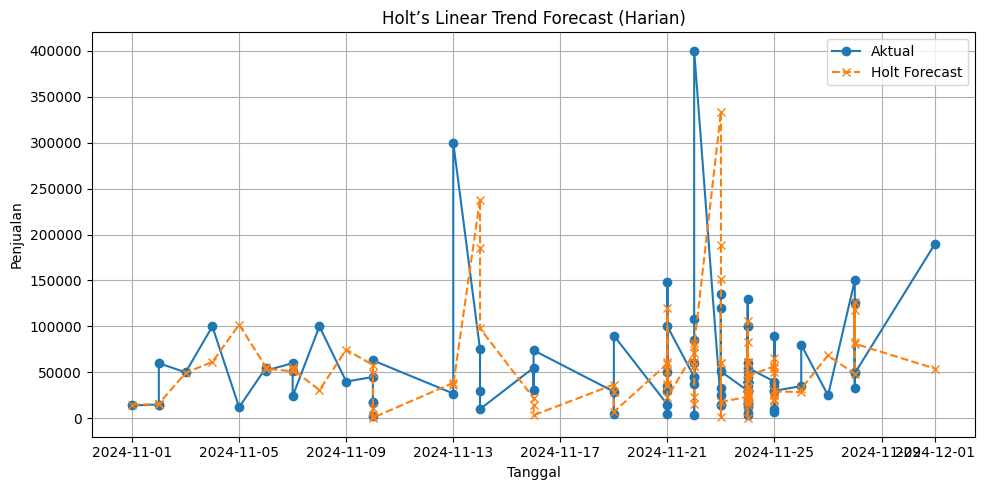

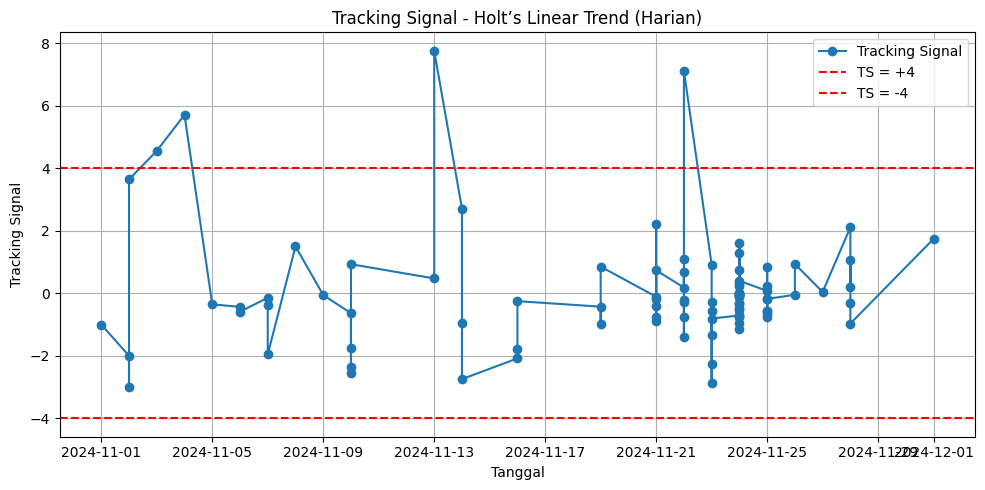

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt

# 1. Load data penjualan harian
# penjualan = pd.read_excel("penjualan.xlsx")  # atau read_csv jika CSV
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 2. Gunakan data Total Penjualan harian sebagai time series
ts = penjualan["Total Penjualan"]

# 3. Holt’s Linear Trend Forecast (tanpa musiman)
model = Holt(ts)
fit = model.fit(smoothing_level=0.5, smoothing_trend=0.5, optimized=False)  # atau optimized=True
penjualan["Holt Forecast"] = fit.fittedvalues

# 4. Hitung error & tracking signal
penjualan["Error"] = penjualan["Total Penjualan"] - penjualan["Holt Forecast"]
penjualan["Absolute Error"] = penjualan["Error"].abs()
penjualan["Cumulative Error"] = penjualan["Error"].cumsum()
penjualan["MAD"] = penjualan["Absolute Error"].expanding().mean()
penjualan["Tracking Signal"] = penjualan["Cumulative Error"] / penjualan["MAD"]

# 5. Tampilkan tabel hasil
print(penjualan[["Tanggal", "Total Penjualan", "Holt Forecast", "Error", "Tracking Signal"]])

# 6. Visualisasi 1: Forecast vs Aktual
plt.figure(figsize=(10,5))
plt.plot(penjualan["Tanggal"], penjualan["Total Penjualan"], marker='o', label="Aktual")
plt.plot(penjualan["Tanggal"], penjualan["Holt Forecast"], marker='x', linestyle='--', label="Holt Forecast")
plt.title("Holt’s Linear Trend Forecast (Harian)")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 7. Visualisasi 2: Tracking Signal
plt.figure(figsize=(10,5))
plt.plot(penjualan["Tanggal"], penjualan["Tracking Signal"], marker='o', label="Tracking Signal")
plt.axhline(4, color='red', linestyle='--', label="TS = +4")
plt.axhline(-4, color='red', linestyle='--', label="TS = -4")
plt.title("Tracking Signal - Holt’s Linear Trend (Harian)")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


      Tanggal  Total Penjualan  Naive Forecast     Error  Tracking Signal
0  2024-11-01            14000             NaN       NaN              NaN
1  2024-11-02            15000         14000.0    1000.0         1.000000
2  2024-11-02            15000         15000.0       0.0         2.000000
3  2024-11-02            60000         15000.0   45000.0         3.000000
4  2024-11-03            50000         60000.0  -10000.0         2.571429
..        ...              ...             ...       ...              ...
89 2024-11-28           150000         49000.0  101000.0         2.664885
90 2024-11-28            33000        150000.0 -117000.0         0.366970
91 2024-11-28           125000         33000.0   92000.0         2.125532
87 2024-11-28            50000        125000.0  -75000.0         0.686073
92 2024-12-01           190000         50000.0  140000.0         3.294405

[93 rows x 5 columns]


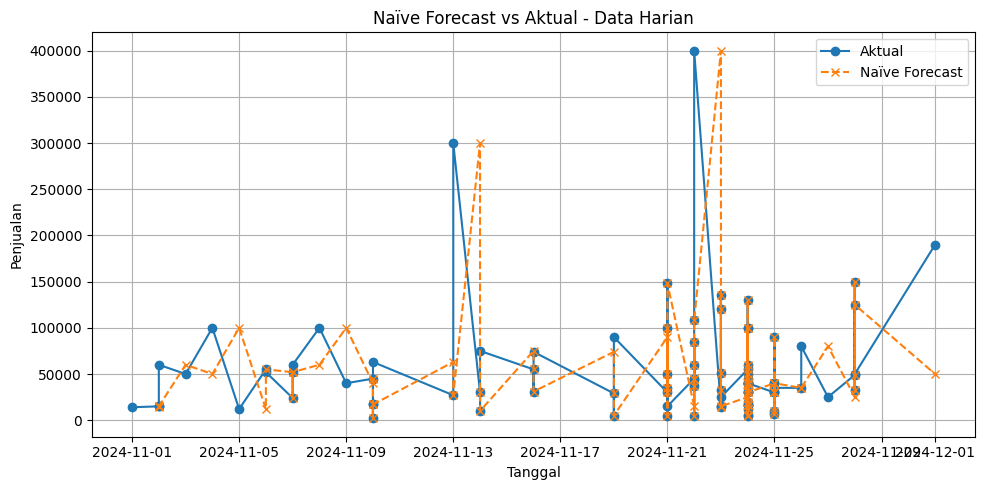

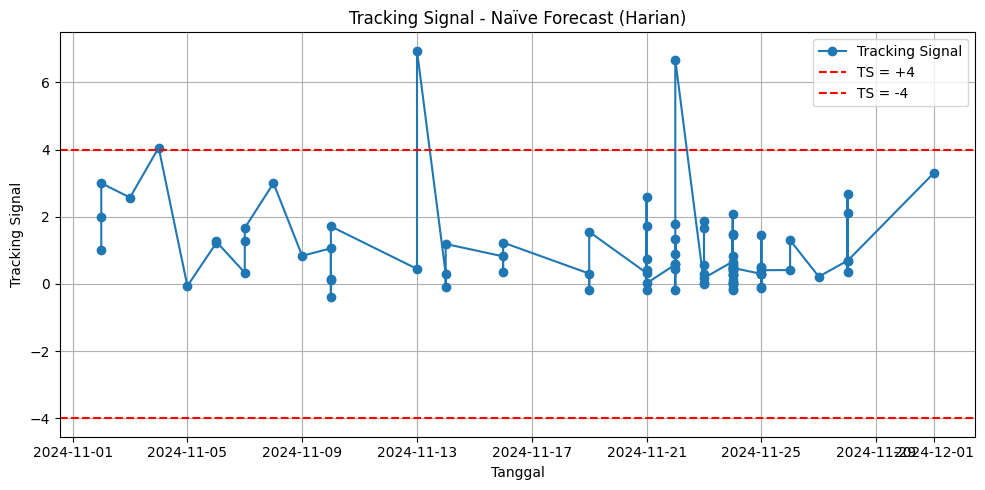

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load dan siapkan data
  # atau read_csv
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 2. Forecast Naïve: prediksi hari ini = nilai hari kemarin
penjualan["Naive Forecast"] = penjualan["Total Penjualan"].shift(1)

# 3. Error, absolute error, MAD, cumulative error, tracking signal
penjualan["Error"] = penjualan["Total Penjualan"] - penjualan["Naive Forecast"]
penjualan["Absolute Error"] = penjualan["Error"].abs()
penjualan["Cumulative Error"] = penjualan["Error"].cumsum()
penjualan["MAD"] = penjualan["Absolute Error"].expanding().mean()
penjualan["Tracking Signal"] = penjualan["Cumulative Error"] / penjualan["MAD"]

# 4. Tampilkan tabel hasil
print(penjualan[["Tanggal", "Total Penjualan", "Naive Forecast", "Error", "Tracking Signal"]])

# 5. Visualisasi: Aktual vs Naive Forecast
plt.figure(figsize=(10,5))
plt.plot(penjualan["Tanggal"], penjualan["Total Penjualan"], marker='o', label="Aktual")
plt.plot(penjualan["Tanggal"], penjualan["Naive Forecast"], marker='x', linestyle='--', label="Naïve Forecast")
plt.title("Naïve Forecast vs Aktual - Data Harian")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 6. Visualisasi: Tracking Signal
plt.figure(figsize=(10,5))
plt.plot(penjualan["Tanggal"], penjualan["Tracking Signal"], marker='o', label="Tracking Signal")
plt.axhline(4, color='red', linestyle='--', label='TS = +4')
plt.axhline(-4, color='red', linestyle='--', label='TS = -4')
plt.title("Tracking Signal - Naïve Forecast (Harian)")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


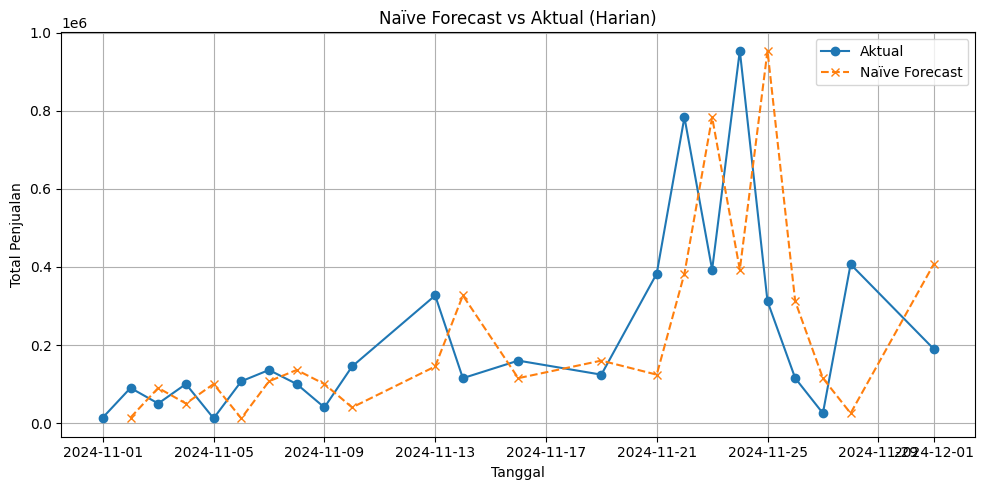

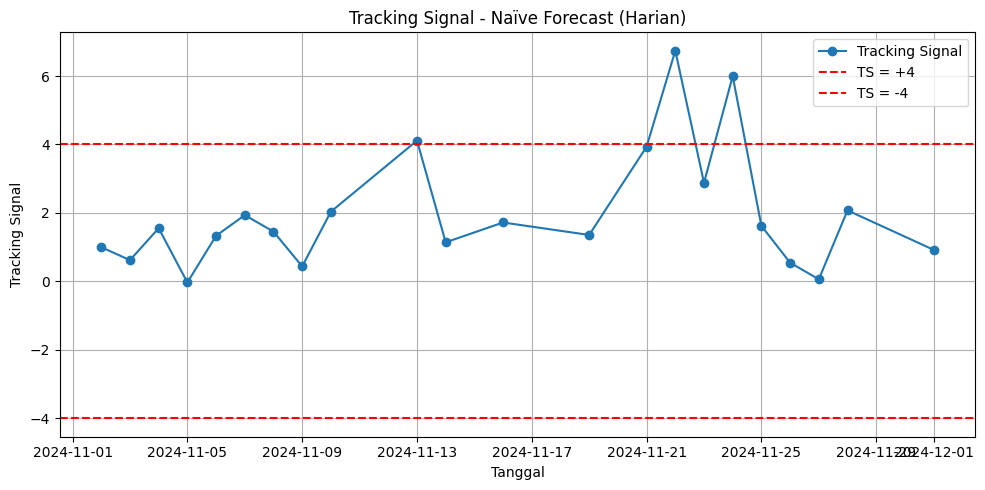

,Tanggal,Total Penjualan,Naive Forecast,|Dt-Ft|,MAD,Tracking Signal
0,2024-11-01,14000,NaN,NaN,NaN,NaN
1,2024-11-02,90000,14000.0,76000.0,76000.000000,1.000000
2,2024-11-03,50000,90000.0,40000.0,58000.000000,0.620690
3,2024-11-04,100000,50000.0,50000.0,55333.333333,1.554217
4,2024-11-05,12000,100000.0,88000.0,63500.000000,-0.031496
5,2024-11-06,107000,12000.0,95000.0,69800.000000,1.332378
6,2024-11-07,136000,107000.0,29000.0,63000.000000,1.936508
7,2024-11-08,100000,136000.0,36000.0,59142.857143,1.454106
8,2024-11-09,40000,100000.0,60000.0,59250.000000,0.438819
9,2024-11-10,145000,40000.0,105000.0,64333.333333,2.036269


In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
 # atau .csv jika perlu
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 2. Jumlahkan penjualan per hari
penjualan_harian = penjualan.groupby("Tanggal")["Total Penjualan"].sum().reset_index()

# 3. Naïve Forecast: nilai hari ini = nilai kemarin
penjualan_harian["Naive Forecast"] = penjualan_harian["Total Penjualan"].shift(1)

# 4. Error & Tracking Signal
penjualan_harian["dt-ft"] = penjualan_harian["Total Penjualan"] - penjualan_harian["Naive Forecast"]
penjualan_harian["|Dt-Ft|"] = penjualan_harian["dt-ft"].abs()
penjualan_harian["Cumulative Error"] = penjualan_harian["dt-ft"].cumsum()
penjualan_harian["MAD"] = penjualan_harian["|Dt-Ft|"].expanding().mean()
penjualan_harian["Tracking Signal"] = penjualan_harian["Cumulative Error"] / penjualan_harian["MAD"]

# 5. Tampilkan hasil


# 6. Visualisasi: Aktual vs Naïve
plt.figure(figsize=(10, 5))
plt.plot(penjualan_harian["Tanggal"], penjualan_harian["Total Penjualan"], marker='o', label="Aktual")
plt.plot(penjualan_harian["Tanggal"], penjualan_harian["Naive Forecast"], marker='x', linestyle='--', label="Naïve Forecast")
plt.title("Naïve Forecast vs Aktual (Harian)")
plt.xlabel("Tanggal")
plt.ylabel("Total Penjualan")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 7. Visualisasi: Tracking Signal
plt.figure(figsize=(10, 5))
plt.plot(penjualan_harian["Tanggal"], penjualan_harian["Tracking Signal"], marker='o', label="Tracking Signal")
plt.axhline(4, color='red', linestyle='--', label="TS = +4")
plt.axhline(-4, color='red', linestyle='--', label="TS = -4")
plt.title("Tracking Signal - Naïve Forecast (Harian)")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
penjualan_harian[["Tanggal", "Total Penjualan", "Naive Forecast", "|Dt-Ft|", "MAD","Tracking Signal"]]

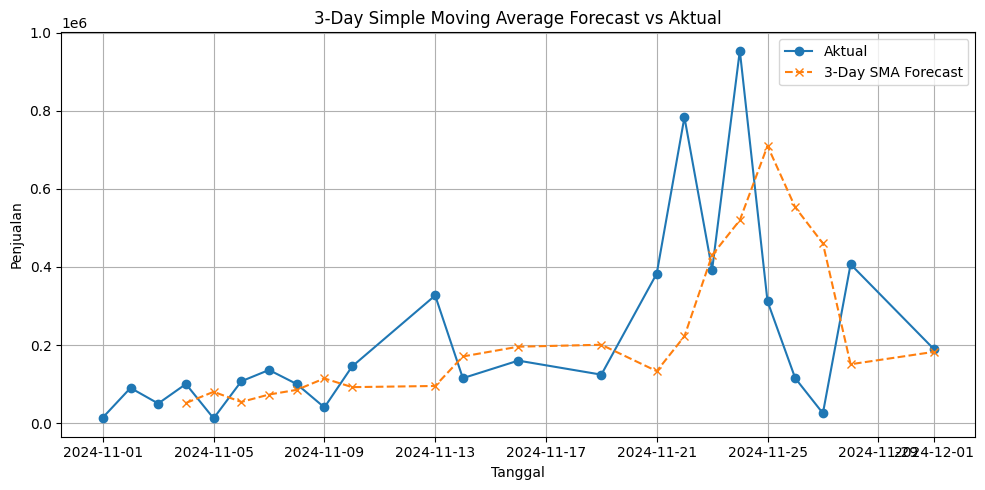

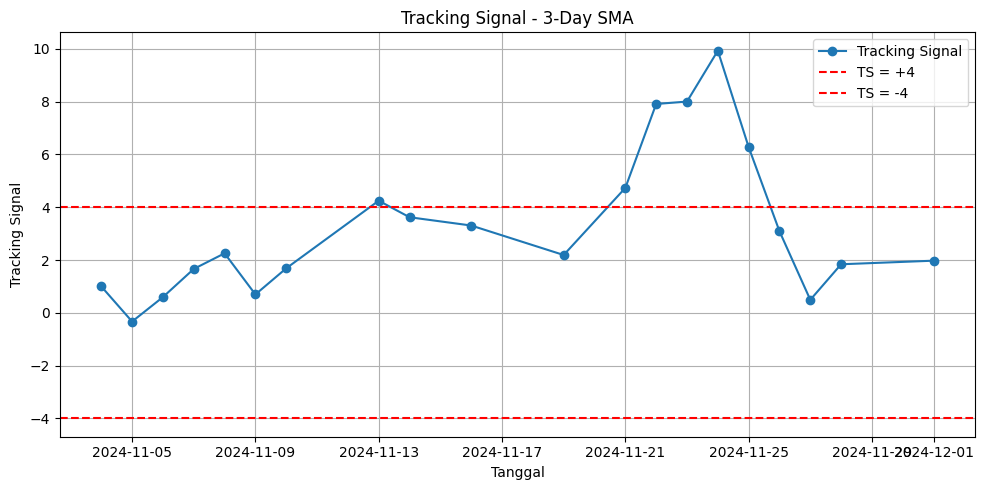

,Tanggal,Total Penjualan,SMA_3,|Dt-Ft|,MAD,Tracking Signal
0,2024-11-01,14000,NaN,NaN,NaN,NaN
1,2024-11-02,90000,NaN,NaN,NaN,NaN
2,2024-11-03,50000,NaN,NaN,NaN,NaN
3,2024-11-04,100000,51333.333333,48666.666667,48666.666667,1.000000
4,2024-11-05,12000,80000.000000,68000.000000,58333.333333,-0.331429
5,2024-11-06,107000,54000.000000,53000.000000,56555.555556,0.595285
6,2024-11-07,136000,73000.000000,63000.000000,58166.666667,1.661891
7,2024-11-08,100000,85000.000000,15000.000000,49533.333333,2.254374
8,2024-11-09,40000,114333.333333,74333.333333,53666.666667,0.695652
9,2024-11-10,145000,92000.000000,53000.000000,53571.428571,1.686222


In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
  # ganti sesuai file kamu
penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# 2. Jumlahkan penjualan per hari
penjualan_harian = penjualan.groupby("Tanggal")["Total Penjualan"].sum().reset_index()

# 3. Hitung 3-Day Simple Moving Average (digeser agar digunakan sebagai forecast)
penjualan_harian["SMA_3"] = penjualan_harian["Total Penjualan"].rolling(window=3).mean().shift(1)

# 4. Error Metrics
penjualan_harian["dt-ft"] = penjualan_harian["Total Penjualan"] - penjualan_harian["SMA_3"]
penjualan_harian["|Dt-Ft|"] = penjualan_harian["dt-ft"].abs()
penjualan_harian["Cumulative Error"] = penjualan_harian["dt-ft"].cumsum()
penjualan_harian["MAD"] = penjualan_harian["|Dt-Ft|"].expanding().mean()
penjualan_harian["Tracking Signal"] = penjualan_harian["Cumulative Error"] / penjualan_harian["MAD"]

# 5. Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(penjualan_harian["Tanggal"], penjualan_harian["Total Penjualan"], marker='o', label="Aktual")
plt.plot(penjualan_harian["Tanggal"], penjualan_harian["SMA_3"], marker='x', linestyle='--', label="3-Day SMA Forecast")
plt.title("3-Day Simple Moving Average Forecast vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 6. Visualisasi Tracking Signal
plt.figure(figsize=(10, 5))
plt.plot(penjualan_harian["Tanggal"], penjualan_harian["Tracking Signal"], marker='o', label="Tracking Signal")
plt.axhline(4, color='red', linestyle='--', label='TS = +4')
plt.axhline(-4, color='red', linestyle='--', label='TS = -4')
plt.title("Tracking Signal - 3-Day SMA")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
penjualan_harian[["Tanggal", "Total Penjualan", "SMA_3", "|Dt-Ft|", "MAD","Tracking Signal"]]

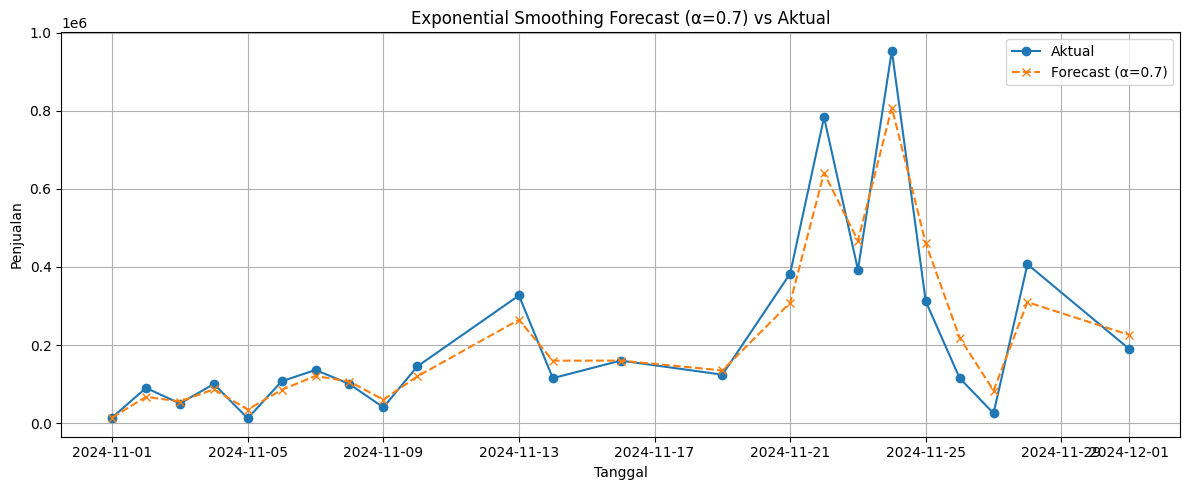

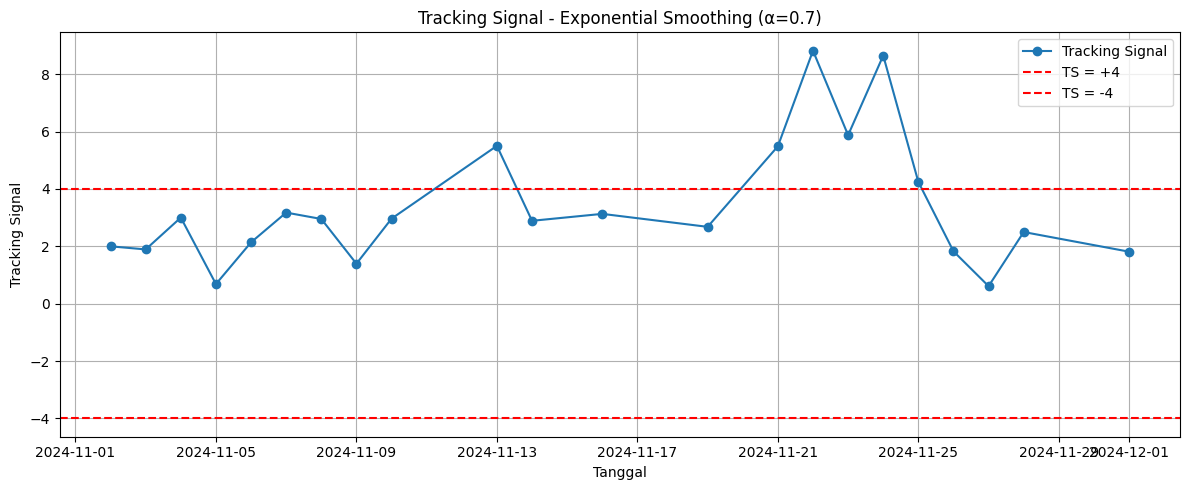

,Tanggal,Total Penjualan,Forecast,|Dt-Ft|,MAD,Tracking Signal
0,2024-11-01,14000,14000.000000,0.000000,0.000000,NaN
1,2024-11-02,90000,67200.000000,22800.000000,11400.000000,2.000000
2,2024-11-03,50000,55160.000000,5160.000000,9320.000000,1.892704
3,2024-11-04,100000,86548.000000,13452.000000,10353.000000,3.003187
4,2024-11-05,12000,34364.400000,22364.400000,12755.280000,0.684234
5,2024-11-06,107000,85209.320000,21790.680000,14261.180000,2.139955
6,2024-11-07,136000,120762.796000,15237.204000,14400.612000,3.177329
7,2024-11-08,100000,106228.838800,6228.838800,13379.140350,2.954349
8,2024-11-09,40000,59868.651640,19868.651640,14100.197160,1.394164
9,2024-11-10,145000,119460.595492,25539.404508,15244.117895,2.964907


In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca ulang data

penjualan["Tanggal"] = pd.to_datetime(penjualan["Tanggal"])
penjualan = penjualan.sort_values("Tanggal")

# Jumlahkan per tanggal
penjualan_harian = penjualan.groupby("Tanggal")["Total Penjualan"].sum().reset_index()

# Exponential Smoothing α = 0.4
alpha = 0.7
penjualan_harian["Forecast"] = penjualan_harian["Total Penjualan"].ewm(alpha=alpha, adjust=False).mean()

# Hitung error, MAD, dan tracking signal
penjualan_harian["Error"] = penjualan_harian["Total Penjualan"] - penjualan_harian["Forecast"]
penjualan_harian["|Dt-Ft|"] = penjualan_harian["Error"].abs()
penjualan_harian["MAD"] = penjualan_harian["|Dt-Ft|"].expanding().mean()
penjualan_harian["Cumulative Error"] = penjualan_harian["Error"].cumsum()
penjualan_harian["Tracking Signal"] = penjualan_harian["Cumulative Error"] / penjualan_harian["MAD"]

# Visualisasi aktual vs forecast
plt.figure(figsize=(12, 5))
plt.plot(penjualan_harian["Tanggal"], penjualan_harian["Total Penjualan"], label="Aktual", marker='o')
plt.plot(penjualan_harian["Tanggal"], penjualan_harian["Forecast"], label="Forecast (α=0.7)", linestyle='--', marker='x')
plt.title("Exponential Smoothing Forecast (α=0.7) vs Aktual")
plt.xlabel("Tanggal")
plt.ylabel("Penjualan")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualisasi Tracking Signal
plt.figure(figsize=(12, 5))
plt.plot(penjualan_harian["Tanggal"], penjualan_harian["Tracking Signal"], marker='o', label="Tracking Signal")
plt.axhline(4, color='red', linestyle='--', label='TS = +4')
plt.axhline(-4, color='red', linestyle='--', label='TS = -4')
plt.title("Tracking Signal - Exponential Smoothing (α=0.7)")
plt.xlabel("Tanggal")
plt.ylabel("Tracking Signal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tampilkan tabel hasil
penjualan_harian[["Tanggal", "Total Penjualan", "Forecast", "|Dt-Ft|", "MAD","Tracking Signal"]]
